In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, auc, roc_curve,confusion_matrix

import os

import sys

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

from operator import itemgetter

import plotly.graph_objects as go

In [ ]:
sys.path.insert(0,"/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester")

In [ ]:
parquet_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Data/parquet_files/"
models_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Models/"

In [ ]:
# Data Class
import DataClass 
from DataClass import Data
# read prepared data
data = Data( 0, "", "",parquet_path)

In [ ]:
data.cycles_data_df.head()

,ID,level,y,l_stances,l_strides_time,l_swings_time,l_stances_time,r_stances,r_strides_time,r_swings_time,r_stances_time,l_peaks_heel,l_peaks_toe,r_peaks_heel,r_peaks_toe
0,GaPt03,3.0,1,"[[30.36, 40.48, 118.14, 177.43, 210.76, 255.53...","[1.36, 1.42, 1.52, 1.3900000000000001, 1.48, 1...","[0.39, 0.6, 0.43, 0.34, 0.44, 0.55, 0.34, 0.46...","[0.96, 0.81, 1.08, 1.04, 1.03, 1.01, 1.0, 0.96...","[[20.79, 27.72, 32.45, 37.07, 63.69, 110.33, 1...","[1.59, 1.27, 1.41, 1.49, 1.56, 1.41, 1.5, 1.32...","[0.39, 0.21, 0.41000000000000003, 0.43, 0.4100...","[1.19, 1.05, 0.99, 1.05, 1.1400000000000001, 0...","[106.92, 30.36, 81.29, 71.72, 94.16, 58.96, 45...","[134.31, 73.04, 129.47, 148.83, 139.15, 163.35...","[107.8, 71.17, 111.1, 141.24, 101.2, 123.42, 1...","[80.63, 134.42, 80.63, 71.61, 98.78, 130.02, 8..."
1,SiPt02,2.5,1,"[[26.84, 37.18, 57.97, 79.64, 88.44, 103.62, 1...","[1.1, 1.08, 1.1, 1.1, 1.18, 1.19, 1.23, 1.19, ...","[0.35000000000000003, 0.33, 0.36, 0.33, 0.36, ...","[0.74, 0.74, 0.73, 0.76, 0.81, 0.8300000000000...","[[25.08, 34.32, 43.45, 54.89, 61.93, 76.23, 13...","[1.05, 1.11, 1.09, 1.1400000000000001, 1.2, 1....","[0.3, 0.37, 0.35000000000000003, 0.34, 0.37, 0...","[0.74, 0.73, 0.73, 0.79, 0.8200000000000001, 0...","[196.46, 238.92, 224.84, 228.8, 176.22, 156.09...","[196.46, 231.99, 220.22, 217.8, 198.88, 184.58...","[218.13, 245.96, 257.51, 243.65, 204.16, 146.3...","[291.06, 321.42, 306.24, 311.3, 291.06, 271.48..."
2,SiPt04,2.0,1,"[[24.75, 102.19, 337.92, 534.8199999999999, 61...","[1.1500000000000001, 1.1400000000000001, 1.18,...","[0.45, 0.44, 0.46, 0.47000000000000003, 0.46, ...","[0.6900000000000001, 0.6900000000000001, 0.71,...","[[20.57, 41.14, 114.51, 329.23, 535.7, 700.92,...","[1.1400000000000001, 1.16, 1.17, 1.15000000000...","[0.43, 0.46, 0.46, 0.43, 0.43, 0.43, 0.44, 0.4...","[0.7000000000000001, 0.6900000000000001, 0.700...","[130.24, 168.08, 148.17, 144.21, 142.23, 142.2...","[253.0, 220.22, 250.69, 248.27, 205.92, 253.0,...","[183.04, 173.69, 204.16, 199.43, 199.43, 155.3...","[271.48, 229.24, 231.55, 271.48, 278.52, 229.2..."
3,GaPt04,2.5,1,"[[20.68, 43.45, 117.15, 222.97000000000003, 28...","[1.22, 1.16, 1.23, 1.28, 1.3900000000000001, 1...","[0.4, 0.34, 0.42, 0.43, 0.43, 0.38, 0.42, 0.46...","[0.81, 0.81, 0.8, 0.84, 0.9500000000000001, 0....","[[22.88, 27.39, 32.01, 38.83, 50.27, 95.149999...","[1.17, 1.19, 1.26, 1.24, 1.44, 1.35, 1.42, 1.5...","[0.3, 0.38, 0.36, 0.35000000000000003, 0.45, 0...","[0.86, 0.8, 0.89, 0.88, 0.98, 0.92, 1.01, 1.11...","[275.22, 257.07, 267.19, 234.85, 263.12, 240.9...","[110.88, 152.02, 106.48, 110.88, 117.59, 126.8...","[159.94, 162.14, 225.17, 222.86, 273.68, 266.7...","[191.73, 211.86, 211.86, 189.31, 176.77, 161.5..."
4,SiPt05,2.5,1,"[[22.77, 37.18, 172.26, 367.07, 540.65, 625.13...","[1.1500000000000001, 1.1500000000000001, 1.140...","[0.42, 0.43, 0.41000000000000003, 0.43, 0.43, ...","[0.72, 0.71, 0.72, 0.71, 0.7000000000000001, 0...","[[25.08, 38.83, 91.30000000000001, 305.25, 369...","[1.1500000000000001, 1.1300000000000001, 1.150...","[0.41000000000000003, 0.38, 0.4100000000000000...","[0.73, 0.74, 0.73, 0.73, 0.71, 0.72, 0.73, 0.7...","[174.13, 172.15, 251.02, 238.92, 196.46, 230.8...","[158.84, 161.15, 140.58, 149.71, 145.09, 156.5...","[66.66, 38.83, 54.89, 66.66, 102.52, 52.58, 36...","[264.44, 264.44, 296.12, 283.47, 271.48, 269.0..."


In [ ]:
data.signals_data_df.head()

,ID,level,y,L1,L2,L3,L4,L5,L6,L7,...,R1,R2,R3,R4,R5,R6,R7,R8,Total_Force_Right,Total_Force_Left
0,GaPt03,3.0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[94.49, 97.79, 97.79, 101.2, 101.2, 104.5, 104...","[139.81, 139.81, 139.81, 139.81, 141.68, 141.6...","[141.13, 141.13, 145.64, 147.95, 152.46, 154.6...","[56.21, 53.9, 56.21, 53.9, 53.9, 53.9, 53.9, 5...","[54.12, 56.54, 56.54, 56.54, 58.85, 58.85, 61....","[0.0, 20.57, 0.0, 0.0, 20.57, 20.57, 22.88, 22...","[98.34, 101.75, 105.16, 108.46, 111.87, 115.28...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[52.8, 39.6, 35.2, 30.8, 26.4, 0.0, 0.0, 0.0, ...","[584.1, 611.49, 601.15, 607.86, 640.5300000000..."
1,SiPt02,2.5,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[249.59, 238.15, 226.71, 212.08, 192.94, 169.6...","[49.94, 43.34, 39.05, 32.56, 23.87, 0.0, 0.0, ...","[327.8, 332.42, 337.15, 339.46, 341.77, 341.77...","[167.53, 169.84, 172.15, 172.15, 174.46, 174.4...",...,"[41.14, 52.58, 100.1, 123.53, 153.12, 218.13, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 69.19, 150.7, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 55.11, 102.96, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[870.8699999999999, 864.0500000000001, 861.959...","[41.14, 52.58, 100.1, 123.53, 153.12, 218.13, ..."
2,SiPt04,2.0,1,"[24.75, 24.75, 22.77, 22.77, 20.68, 0.0, 0.0, ...","[90.31, 84.37, 78.32, 72.38, 64.46, 56.54, 48....","[92.95, 88.55, 81.84, 77.33, 68.42, 61.71, 53....","[128.15, 136.4, 142.67, 148.83, 155.1, 163.35,...","[129.8, 136.29, 142.78, 151.47, 160.16, 168.96...","[33.88, 35.97, 38.06, 42.35, 44.44, 48.73, 50....","[42.79, 47.3, 49.61, 54.12, 56.32, 63.36, 72.8...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[571.89, 585.2, 587.62, 603.02, 603.35, 598.73...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,GaPt04,2.5,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[153.12, 146.3, 141.68, 132.66, 125.84, 116.71...","[92.51, 90.42, 88.33, 84.04, 79.86, 75.57, 71....","[118.36, 113.85, 109.45, 105.05, 100.76, 94.27...","[132.88, 135.41, 137.94, 142.89, 145.42, 147.8...","[46.53, 48.73, 50.82, 52.91, 55.11, 57.53, 57....","[150.81, 153.34, 155.87, 158.4, 160.93, 163.46...","[144.21, 148.83, 151.14, 155.87, 160.49, 165.1...","[136.29, 138.82, 141.35, 143.88, 146.41, 148.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[974.71, 975.7, 976.58, 975.6999999999999, 974..."
4,SiPt05,2.5,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.77...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 

In [ ]:
y = [1,2,3]
y[:2]

[1, 2]

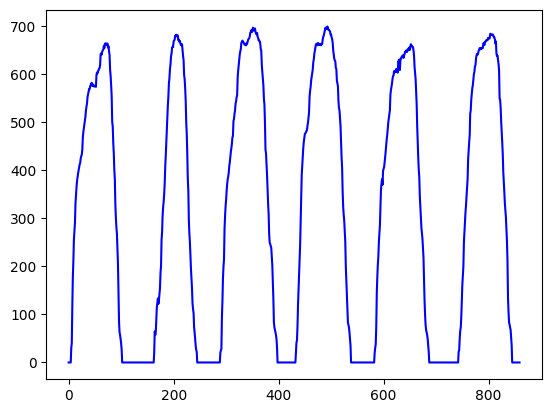

In [ ]:

y = data.signals_data_df['Total_Force_Right'].iloc[0][40:900]
plt.plot( y,  color = 'b')
plt.show()

In [ ]:
len(y1)

TypeError: ignored

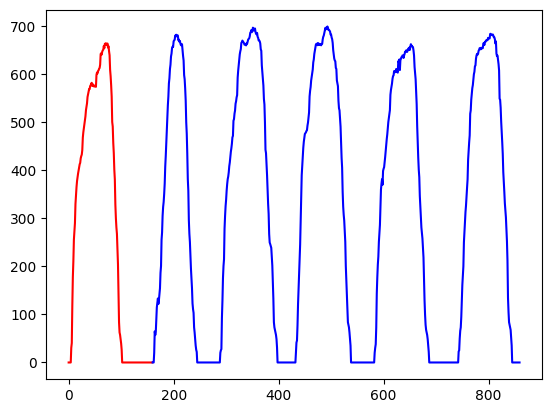

In [ ]:
x= np.linspace (0,1000*0.01,1000)
y = data.signals_data_df['Total_Force_Right'].iloc[0][40:900]
y1 = y.copy()
y2 = y.copy()

for i in range(160,860) : y1 [i] = np.nan
for i in range(0,160) : y2 [i] = np.nan

plt.plot( y1, color = 'r')
plt.plot( y2, color = 'b')
plt.show()

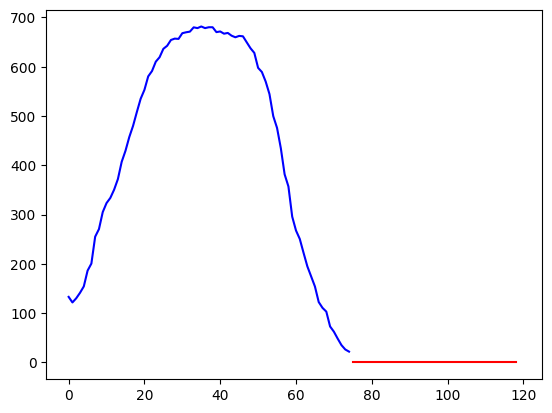

In [ ]:
signal = data.signals_data_df['Total_Force_Right'].iloc[0][210:330]
pos_signal = signal.copy()
neg_signal = signal.copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

#plotting
#plt.style.use('fivethirtyeight')
plt.plot(pos_signal, color='b')
plt.plot(neg_signal, color='r')
#plt.savefig('pos_neg.png', dpi=200)
plt.show()

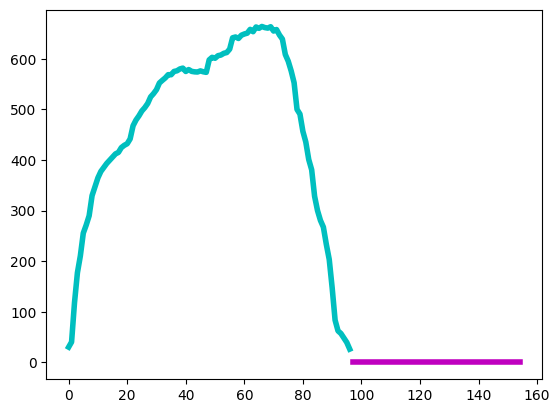

In [ ]:
signal = data.signals_data_df['Total_Force_Right'].iloc[0][45:200]
pos_signal = signal.copy()
neg_signal = signal.copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

#plotting
#plt.style.use('fivethirtyeight')
plt.plot(pos_signal, color='c',linewidth=4.0)
plt.plot(neg_signal, color='m',linewidth=4.0)
#plt.savefig('pos_neg.png', dpi=200)
plt.show()

In [ ]:
data.cycles_data_df['r_stances'].iloc[0][0]

array([ 20.79,  27.72,  32.45,  37.07,  63.69, 110.33, 138.82, 153.56,
       216.15, 236.06, 294.8 , 334.84, 371.25, 403.92, 429.99, 450.01,
       482.24, 496.87, 512.38, 519.09, 526.9 , 535.7 , 545.27, 553.19,
       572.44, 585.2 , 597.85, 610.83, 625.02, 639.21, 654.17, 666.6 ,
       674.41, 685.41, 692.56, 701.58, 705.76, 711.59, 710.27, 713.9 ,
       719.07, 711.7 , 712.03, 731.06, 731.61, 727.65, 726.11, 722.04,
       719.07, 718.96, 712.8 , 712.03, 716.43, 721.71, 720.28, 718.63,
       719.4 , 717.97, 716.87, 692.01, 688.05, 688.6 , 681.56, 675.95,
       673.42, 674.52, 674.96, 673.2 , 680.02, 674.41, 677.82, 679.36,
       683.32, 682.22, 683.98, 666.05, 665.83, 668.25, 665.72, 671.44,
       672.43, 670.78, 671.22, 668.8 , 664.51, 662.09, 659.12, 637.34,
       637.56, 634.7 , 631.73, 626.23, 616.33, 606.65, 590.48, 557.92,
       540.21, 522.61, 501.82, 472.89, 450.23, 422.84, 401.06, 379.39,
       353.21, 330.11, 316.36, 303.05, 293.7 , 255.53, 223.41, 203.28,
      

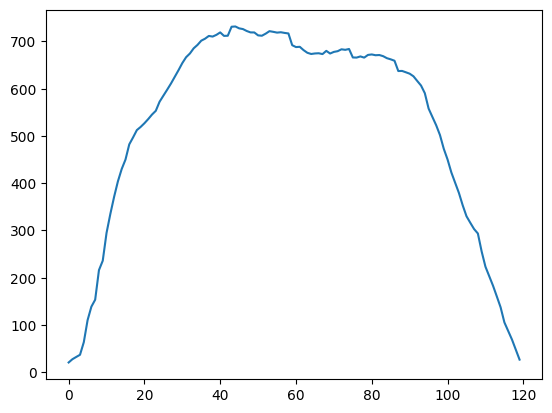

In [ ]:

y = data.cycles_data_df['r_stances'].iloc[0][0]

plt.plot( y, label='Original')
plt.show()